In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
trainD = pd.read_csv('datasets/train.csv')
testD = pd.read_csv('datasets/test.csv')

Tréningový dataset pozostáva z 2800 záznamov a 40 atribútov<br><br>
<b>Typy atribútov v počtoch:</b><br>
object: 29<br>
float: 6<br>
int: 5

In [3]:
print(trainD.info(max_cols=0))
trainD.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Columns: 40 entries, Unnamed: 0 to personal_info
dtypes: float64(6), int64(5), object(29)
memory usage: 875.1+ KB
None


object     29
float64     6
int64       5
dtype: int64

# Age + date_of_birth

date_of_birth    age
2052    1563-06-03  455.0

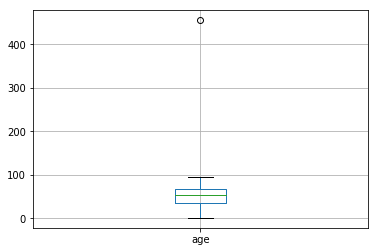

In [9]:
trainD.boxplot(column='age')
trainD[trainD['age'] == 455].loc[:,['date_of_birth','age']]

Dataset obsahuje záznam s outlierom majúc 455 rokov, ktorý korešponduje s dátumom narodenia, čo znamená, že atribút age neuvádza v ktorom roku človeka boli testy vykonané, roky sa počítali len vzhľadom k určitému času. 
Návrh riešenia podľa poskytnutých informácií o zdroji datasetu alebo z predspracovania dátumov:
- Ak by sa táto skutočnosť vzťahovala aj na ostatné záznamy rovnakým spôsobom, tak atribút date_of_birth je redundantný kedže je zahrnutý v atribúte age. Niesol by len informáciu, do koľkého roku človeka mohol byť test vykonaný, preto vychýlené hodnoty by som nahradzoval napr. rokom 95. 
- Ak by sa to vzťahovalo len čiastočne (počítané v rámci odlišného určitého času), zistil by som pre každý záznam o akom čase sa jedná cez kombináciu týchto atribútov a transformoval roky tak, aby sa vzťahovali k rovnakému času.
- Ak by sa to nepočítalo vzhľadom na čas, ale v roku v ktorom sa test vykonal, vychýlené hodnoty by som nahrádzal najbližšie pravdepodobnou hodnotou -> zaokruhleným mediánom. 
 
Pre krajšiu vizualizáciu bol prvok s 455 rokmi odfiltrovaný. Atribút obsahuje dátový typ float, ktorý by bolo taktiež vhodne pretypovať na integer.<br><br>
<b>Distribúcia a histogram</b><br>

count    2799.00000
mean       51.84423
std        20.46116
min         1.00000
25%        36.00000
50%        54.00000
75%        67.00000
max       455.00000
Name: age, dtype: float64

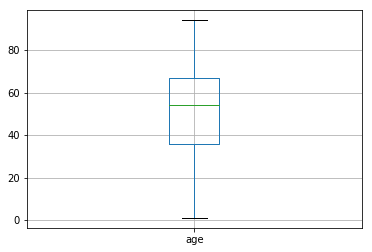

In [10]:
trainD[trainD['age'] < 100].boxplot(column='age')
trainD.age.describe()

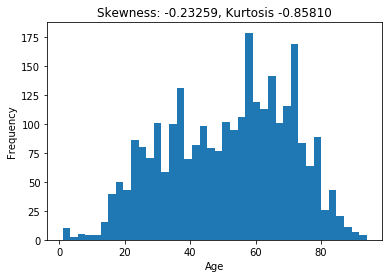

In [11]:
filt = trainD[trainD['age'] < 100]         # odfiltrovanie zaznamu so 455 rokmi
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(filt['age']), (stats.kurtosis(filt['age']))))
plt.xlabel('Age')
filt.age.plot(kind='hist', bins = 40, x = 'age')

Z príkazu deskriptívnej štatistiky je vidieť, že je napočítaných 2799 hodnôt a jeden záznam je teda nevyplnený. Nevyplnené hodnoty by mohli byť vyplňované opäť zaokruhlenými mediánmi.<br>
Taktiež je vidieť spolu s <b>boxplotom a histogramom</b> ako sú tieto hodnoty distribuované. Väčší rozsah hodnôt sa pohybuje v medzi-kvartiloch Q1-Q2 (hodnotovo 18) ako v Q2-Q3 (hodnotovo 13). <br>Tomu zodpovedá aj <b>Skewness</b>, ktorý je aj kvôli tomu záporný a hovorí o tom, že obsahuje väčší rozsah hodnôt nalavo od mediánu v histograme.<br>
Záporná hodnota <b>Kurtosis</b> nám hovorí o tom, že hodnoty sú rovnomernejšie rozpoložené od normálneho rozdelenia. Na histograme je vidieť, že rozpoloženie sa zásadne začne meniť pri rokoch 0-20 a 80-100.<br>
Neboli zpozorované žiadne korelácie s ostatnými atribútami a môže preto slúžiť ako dobrý prediktor (najmä vtedy ak atribút age vyjadruje v ktorom roku človeka otestovanie nastalo.<br>

<b>date_of_birth</b> atribút obsahuje 3 rôzne formáty dátumov. Je potrebné transformovať dátumy buď na minimálne existujúci formát DD-MM-YY (ktorého je aj najväčší počet), alebo ak sa dá zistiť, z akého storočia pochádzajú DD-MM-YY formáty (pravdepodobne 20.), tak sa môžu transformovať na presnejšie uvedený rok (YYYY-MM-DD) ak chceme mať zahrnuté aj iné storočia.


In [142]:
trainD[['date_of_birth']].iloc[5:12]

date_of_birth
5   1975-02-14 00 00 00
6              14-01-52
7              24-07-67
8              20-12-59
9              11-06-41
10             11-12-98
11        13-07-39 0:00

# TSH
<b>Distribúcia a histogram

count    2516.000000
mean        4.672150
std        21.449453
min         0.005000
25%         0.440000
50%         1.400000
75%         2.600000
max       478.000000
Name: TSH, dtype: float64


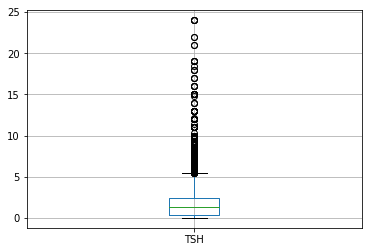

In [12]:
filt = trainD[trainD['TSH'] < 25]
print(trainD.TSH.describe())       # bez filtracie
filt.boxplot(column='TSH')         # filtrovany boxplot

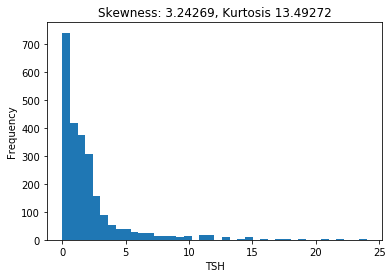

In [13]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(filt['TSH']), (stats.kurtosis(filt['TSH']))))
plt.xlabel('TSH')
filt.TSH.plot(kind='hist', bins = 40)

In [134]:
trainD[trainD['TSH'] > 25].TSH.describe()

count     75.000000
mean      85.458667
std       92.207843
min       26.000000
25%       35.500000
50%       51.000000
75%       99.500000
max      478.000000
Name: TSH, dtype: float64

Na boxplote je vidieť, že atribút obsahuje veľa outlierov a to je ešte odflitrovaný hodnotami vyššími ako 25. Tých je napočítaných až 75. Pri takejto veľkej rozptýlenosti je vhodné hodnoty znormalizovať pre algoritmy strojového učenia napr. odmocninou. Počet vyplnených hodnôt je 2516 z 2800, nevyplnené hodnoty môžu byť nahradené mediánom. Tento atribút očividne neobsahuje žiadne vychýlené hodnoty kedže vychádzajú s exponenciálnym klesaním, čomu zodpovedajú aj metriky vysokého Skewness a Kurtosis na histograme.<br>

# T3 + T4U
<b>Histogram, vzťahy a distribúcia

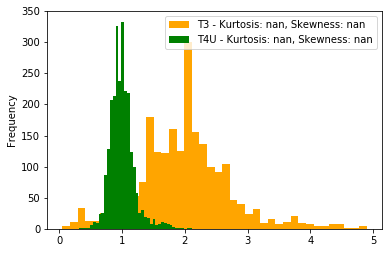

In [14]:
labels = []   # kurt(sample, fisher=False)
filt = trainD[trainD['T3'] < 5]

labels.append("T3 - Kurtosis: %.5f, Skewness: %.5f" % (stats.kurtosis(trainD['T3']), stats.skew(trainD['T3'])))
labels.append("T4U - Kurtosis: %.5f, Skewness: %.5f" % (stats.kurtosis(trainD['T4U']), stats.skew(trainD['T4U'])))
filt.T3.plot(kind='hist', bins = 40, color="Orange")
trainD.T4U.plot(kind='hist', bins = 40, color="Green")
plt.legend(labels)


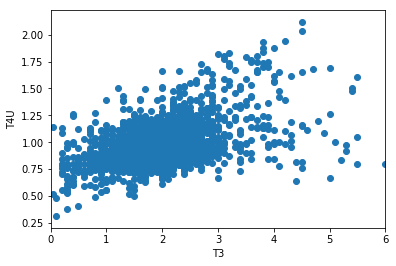

In [15]:
plt.xlim(0, 6)  # decreasing time
plt.xlabel('T3')
plt.ylabel('T4U')
plt.scatter(trainD.T3, trainD.T4U) # kategoricke - spojite potom.. lepsie cez boxploty a histogramy

               T4U           T3
count  2503.000000  2215.000000
mean      0.997912     2.024966
std       0.194390     0.824600
min       0.310000     0.050000
25%       0.880000     1.600000
50%       0.980000     2.000000
75%       1.080000     2.400000
max       2.120000    10.600000


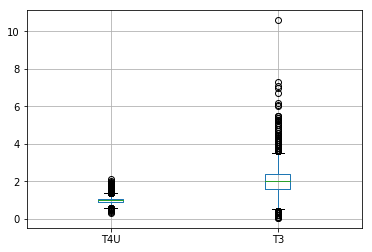

In [16]:
print(trainD[['T4U', 'T3']].describe())
trainD.boxplot(['T4U', 'T3'])

Atribúty T3 T4U majú určitú podobnosť v distribuovaných hodnotách. T4U sa pohybuje v hodnotách 0.3 - 2.12, pričom T3 hodnoty pohybujú od 0,05 po 10,6. Rast týchto hodnôt je možné sledovať cez scatter plot a mohol by vyjadrovať lineárnu závislosť aj keď len s veľkou odchylkou. Taktiež hodnoty v kvartiloch(25/50/75) sú u T3 približne 2 krát väčšie ako u T4U. Chýbajúce hodnoty by sa mohli dopĺňať na základe mediánu či priemeru a prípadne aj druhého vyplneného atribútu.

# TT4, FTI a TBG 
FTI a TBG - potreba predspracovania atribútov (typ object na integer). Chýbajúce hodnoty sú reprezentované otáznikom, atribút TBG pozostáva len z nich, nemá teda žiadnu hodnotu a môže sa zahodiť. Pri FTI a TT4 sa môže pristupovať podobným spôsobom riešenia ako v predchádzajúcich atribútoch<br><br>

# fnlwgt
<b>Distribúcia</b>

count    2.800000e+03
mean     1.915988e+05
std      1.120316e+05
min      1.228500e+04
25%      1.179488e+05
50%      1.797535e+05
75%      2.409325e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


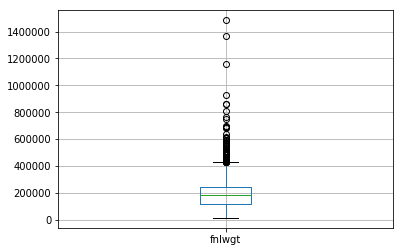

In [17]:
print(trainD['fnlwgt'].describe())
trainD.boxplot(['fnlwgt'])

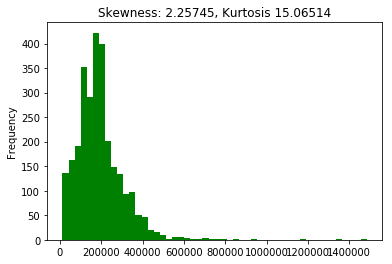

In [18]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['fnlwgt']), (stats.kurtosis(trainD['fnlwgt']))))
trainD.fnlwgt.plot(kind='hist', bins = 50, color="Green")

Atribút neobsahuje žiadne chýbajúce hodnoty a nemá v sebe žiadne chybové hodnoty. Neboli nájdené žiadne závislosti s inými numerickými atribútami a môže byť dobrým prediktorom. Obrázky poukazujú na distribúciu hodnôt, ktoré sú naklonené na lavú stranu a od hodnoty 30K začínajú rapídne klesať. Pri takýchto veľkých hodnotách by bolo vhodné použiť normalnizáciu napr. logaritmom.

# education-num

count    2800.000000
mean       12.720714
std       330.168277
min     -1500.000000
25%         9.000000
50%        10.000000
75%        13.000000
max      1600.000000
Name: education-num, dtype: float64



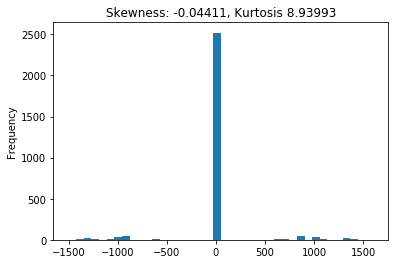

In [20]:
print(trainD['education-num'].describe())
print()
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['education-num']), (stats.kurtosis(trainD['education-num']))))
trainD['education-num'].plot(kind='hist', bins = 40)

Atribúty obsahujú vychýlené hodnoty ktoré je možné opraviť cez vydelenie stomi a záporné hodnoty zmeniť na kladné. Neobsahuje žiadne chýbajúce hodnoty. Taktiež by bolo vhodné pretypovať atribút z float na integer.

# capital-gain / capital-loss / hours-per-week

count     2520.000000
mean       932.840079
std       7190.092535
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

count      171.000000
mean     13747.116959
std      24265.998575
min        114.000000
25%       3103.000000
50%       6849.000000
75%      13550.000000
max      99999.000000
Name: capital-gain, dtype: float64


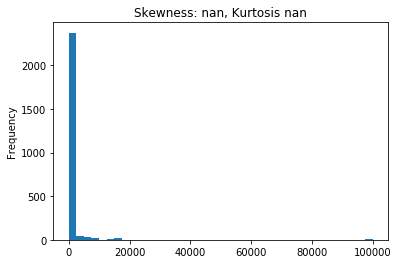

In [16]:
print(trainD['capital-gain'].describe())
print()
filt = trainD[trainD['capital-gain'] > 0]
print(filt['capital-gain'].describe())

plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['capital-gain']), (stats.kurtosis(trainD['capital-gain']))))
trainD['capital-gain'].plot(kind='hist', bins = 40)

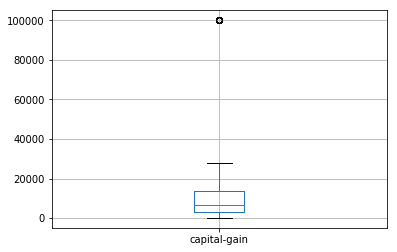

In [24]:
filt.boxplot(column='capital-gain')

Atribúty obsahujú vychýlené hodnoty 99999 (alebo 99 v prípade hours-per-week) ktoré sú buď limitované počtom znakov a v skutočnosti by mohli byt ešte väčšie (v tomto prípade by sa hodnoty neupravovali), alebo je v nich chyba ktorá by sa mohla nahradiť najfrekventovanejšími hodnotami. V prípade capital-gain/loss by sa teda nahradili nulou a hours-per-week by obsahovala číslo 40. Chýbajúce hodnoty by sa taktiež mohli takýmito hodnotami nahradzovať. Len 171 hodnôt je odlišných od nuly z 2520. Atribút hours-per-week obsahuje 1534 hodnôt neobsahujúcich hodnotu 40. Nenulové atribúty capital-gain sa medzi Q1 a Q3 pohybujú medzi 3000 až 13000.

<b>hours-per-week

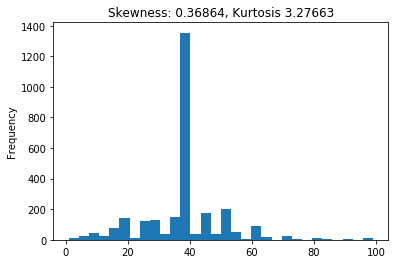

In [17]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['hours-per-week']), (stats.kurtosis(trainD['hours-per-week']))))
trainD['hours-per-week'].plot(kind='hist', bins = 30)

In [18]:
print(trainD['hours-per-week'].describe())

count    2800.000000
mean       38.699286
std        12.700817
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        99.000000
Name: hours-per-week, dtype: float64


In [19]:
filt = trainD[trainD['hours-per-week'] != 40]
print(filt['hours-per-week'].describe())

count    1534.000000
mean       37.625815
std        17.087305
min         1.000000
25%        25.000000
50%        36.000000
75%        50.000000
max        99.000000
Name: hours-per-week, dtype: float64


# Vzťahy atribútov (Kategorický - spojitý)

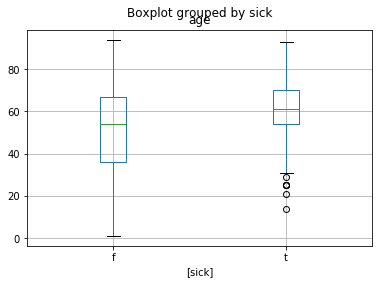

In [9]:
filt = trainD[trainD['age'] < 100]
filt[['sick', 'age']].boxplot(by='sick', )

Z tohoto obrázku je možné vyčítať, v akom rozsahu rokov sú v datasete ľudia chorý. Najväčší počet chorých sa pohybuje medzi 50 a 70 rokmi

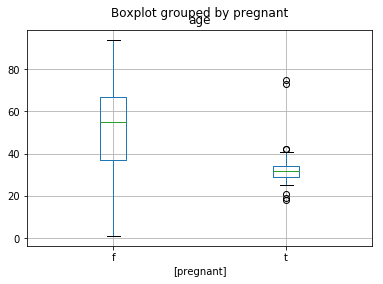

In [12]:
filt[['pregnant', 'age']].boxplot(by='pregnant', )

Tehotné ženy väčšinou pohybujú medzi 30 a 35 rokmi

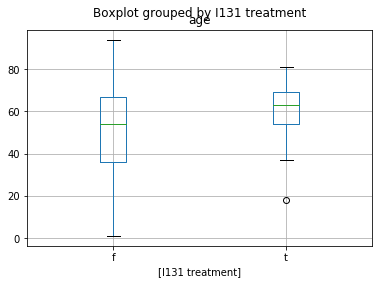

In [14]:
filt[['I131 treatment', 'age']].boxplot(by='I131 treatment', )

Liečba I131 sa vykonáva najmä v 50 až 70 rokoch